# COSC2753 - Assignment 1 - Length of Stay Prediction 

**RMIT University Vietnam**

**Course:** COSC2753

**Name:** Pham Cong Minh

**ID:** s3818102

**Lecturer:** Dr. Duy Dang Pham Thien

**Submission Due Date:** 16 April 2021

## Main task

Predict if a given patient (i.e. a new born child) will be discharged from the hospital within 3 days (class 0) or will stay in hospital beyond that (class 1). The required model are logistic regression or its variant for binary classification

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('dark_background')

pd.set_option('display.max_columns', 70)

## 2. Read train data & inspect

### 2.1 Read data

In [2]:
# Import the train dataset
train_data = pd.read_csv('train_data.csv').drop(['ID', 'HealthServiceArea'], axis=1)
train_data.head()

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1


### 2.2 Inspect data

In [3]:
# Analyze descriptive statistics
train_data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


In [4]:
# Number of columns and rows
train_data.shape

(59966, 14)

In [5]:
# Analyze dtypes
train_data.dtypes

Gender                          object
Race                            object
TypeOfAdmission                 object
CCSProcedureCode                 int64
APRSeverityOfIllnessCode         int64
PaymentTypology                 object
BirthWeight                      int64
EmergencyDepartmentIndicator    object
AverageCostInCounty              int64
AverageChargesInCounty           int64
AverageCostInFacility            int64
AverageChargesInFacility         int64
AverageIncomeInZipCode           int64
LengthOfStay                     int64
dtype: object

In [6]:
# Check missing value and percentage
def missing_value_of_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percentage = round(total/data.shape[0]*100,2)
    return pd.concat([total,percentage], axis=1, keys=['Total','Percentage'])

In [7]:
missing_value_of_data(train_data)

,Total,Percentage
LengthOfStay,0,0.0
AverageIncomeInZipCode,0,0.0
AverageChargesInFacility,0,0.0
AverageCostInFacility,0,0.0
AverageChargesInCounty,0,0.0
AverageCostInCounty,0,0.0
EmergencyDepartmentIndicator,0,0.0
BirthWeight,0,0.0
PaymentTypology,0,0.0
APRSeverityOfIllnessCode,0,0.0


## 3. Data transformation and visualization

### 3.1. Displot train dataset

<ipython-input-8-e5747f67593e>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train_data.hist(ax = ax)


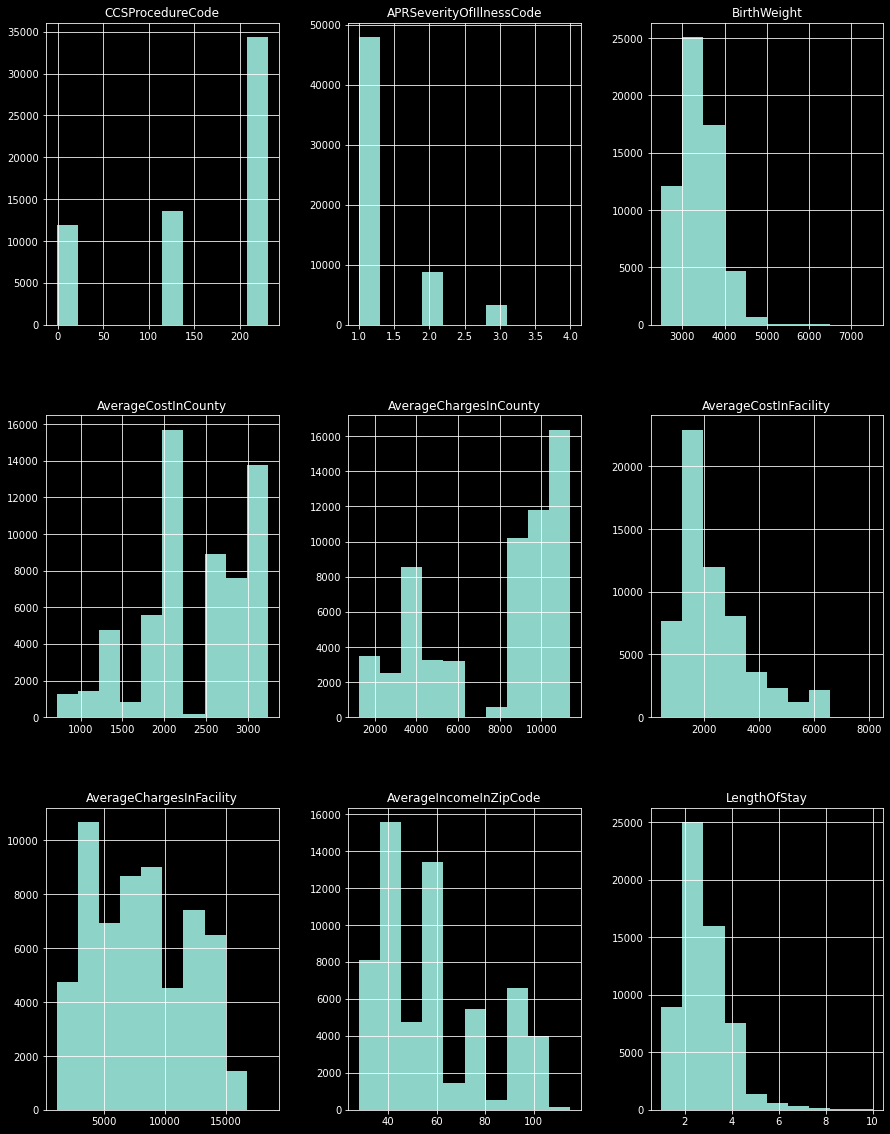

In [8]:
# Displot descriptive statistics from the dataframe
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_data.hist(ax = ax)
plt.show()

### 3.3. Deep inspection to consider anomaly data point(s)

In [9]:
for col in train_data.columns:
    print(col)
    count = train_data[col].value_counts()
    percent = train_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

Gender
   Counts Percent
M   30978  51.66%
F   28987  48.34%
U       1    0.0%
--------------------------------
Race
                        Counts Percent
White                    32943  54.94%
Other Race               18314  30.54%
Black/African American    8183  13.65%
Multi-racial               526   0.88%
--------------------------------
TypeOfAdmission
           Counts Percent
Newborn     58741  97.96%
Emergency     659    1.1%
Urgent        412   0.69%
Elective      154   0.26%
--------------------------------
CCSProcedureCode
      Counts Percent
 228   19886  33.16%
 115   13628  22.73%
 0     11189  18.66%
 220   10773  17.97%
 231    2981   4.97%
-1       769   1.28%
 216     740   1.23%
--------------------------------
APRSeverityOfIllnessCode
   Counts Percent
1   47953  79.97%
2    8760  14.61%
3    3252   5.42%
4       1    0.0%
--------------------------------
PaymentTypology
                           Counts Percent
Medicaid                    28723   47.9%
Private He

* In Gender, “Unknown” gender can be considered as an outliner (only appears once). Gender is categorical data so we can drop “U” column after encoding.

* In TypeOfSubmission, “Trauma” and “Not Available” haven’t been seen.

* In CCSProcedureCode, -1 may imply something wrong (missing value), but with 1.28%, we will treat it as categorical data.

* In APRSeverityOfIllnessCode, 4 can be considered as an outliner (only appears once). But it’s ordinal data, so we can’t drop or transform.

### 3.2. Convert LoS to binary targets

In [10]:
# Class 0 is less than 3 days and 1 otherwise
train_data['LengthOfStay'] = train_data['LengthOfStay'].apply(lambda x: 0 if int(x) <= 3 else 1)
train_data['LengthOfStay'].value_counts()

0    49895
1    10071
Name: LengthOfStay, dtype: int64

C:\Users\luong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


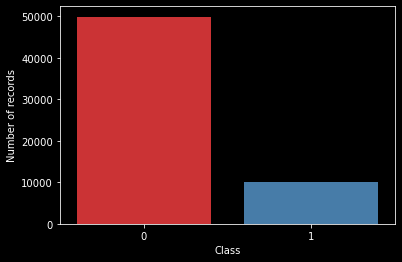

In [11]:
# Countplot the transform value
sns.countplot(train_data['LengthOfStay'], palette='Set1')
plt.xlabel('Class')
plt.ylabel('Number of records')
plt.show()

=> The ratio is 1/5

### 3.3 Plot the attributes of class 0 and 1

In [12]:
# Draw the histogram for class 0 and 1
def Facet_Grid_sns(df):
    for c in df.columns:
        g = sns.FacetGrid(df, col='LengthOfStay',height =4, aspect = 2)
        g.map(plt.hist, str(c) ,bins=20)
        g.set_axis_labels(c, "Count")

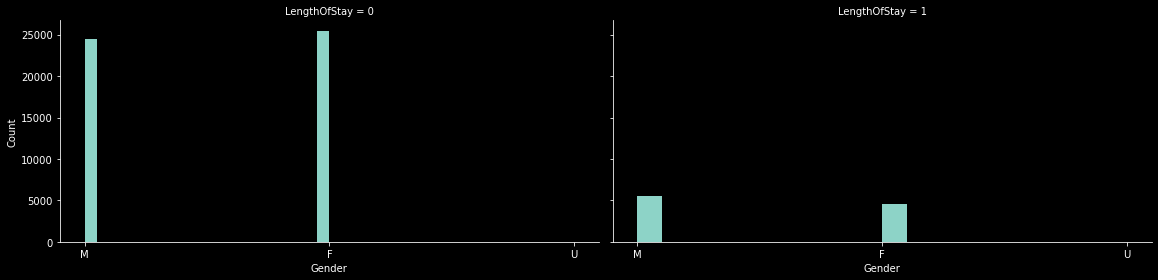

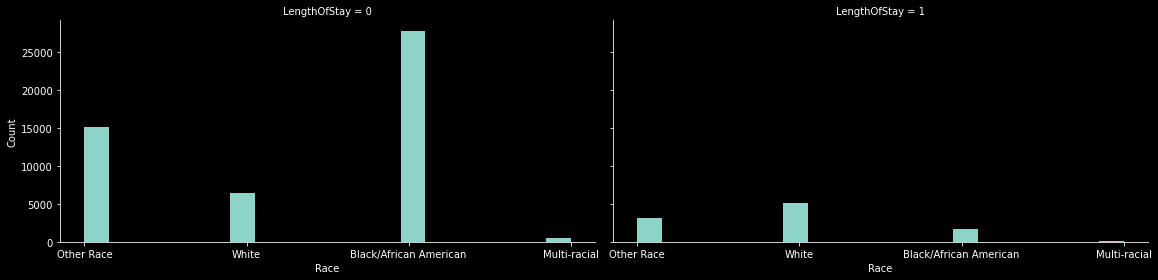

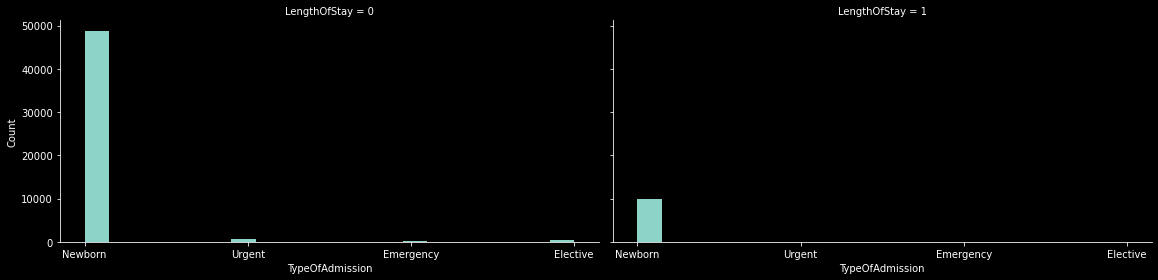

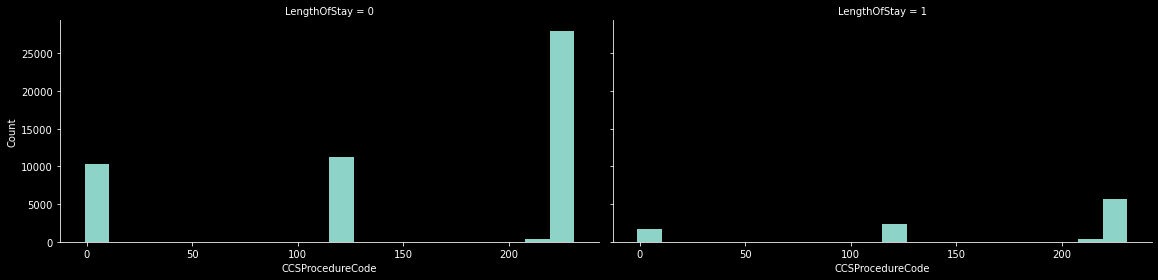

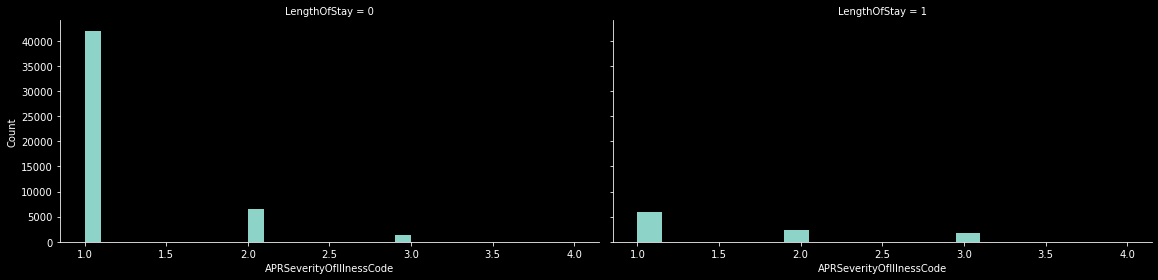

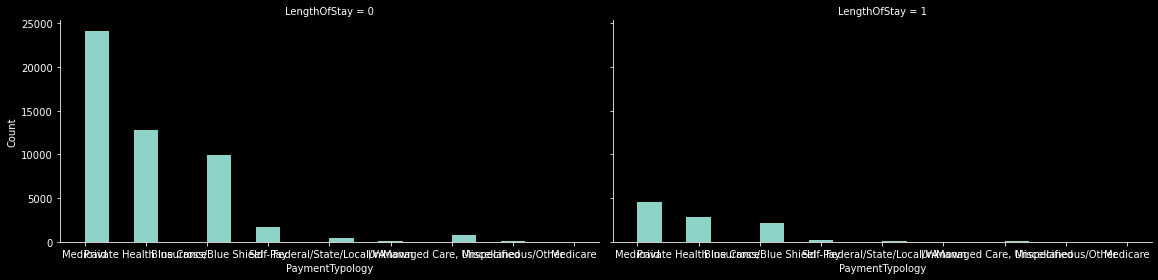

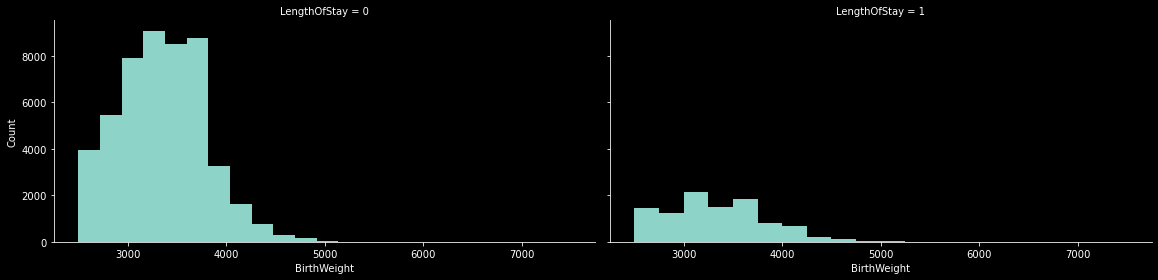

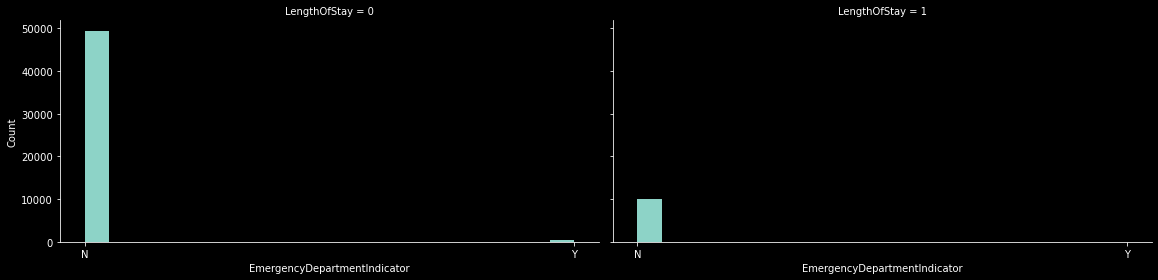

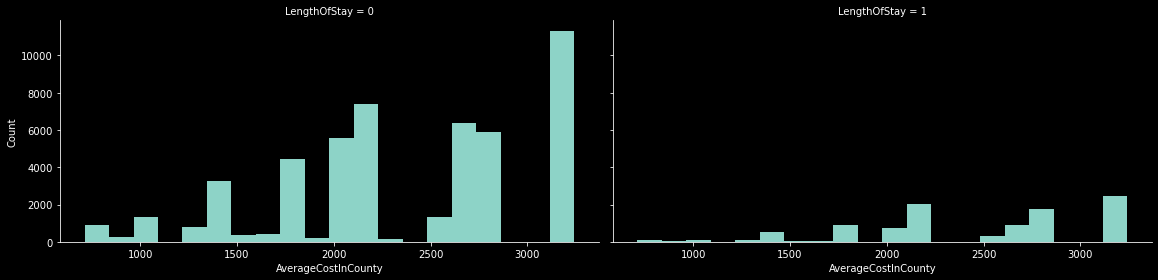

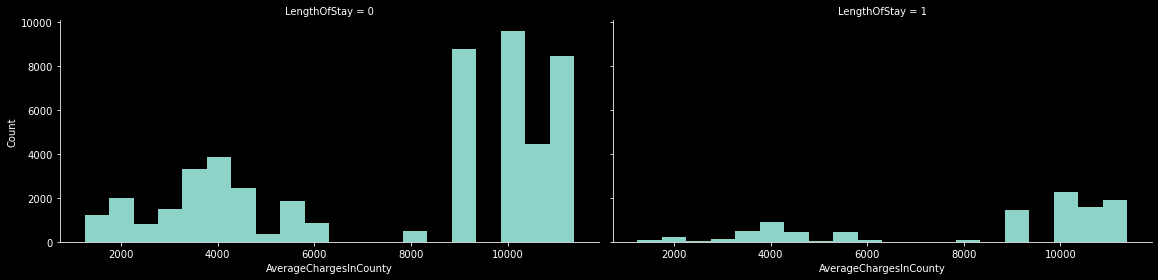

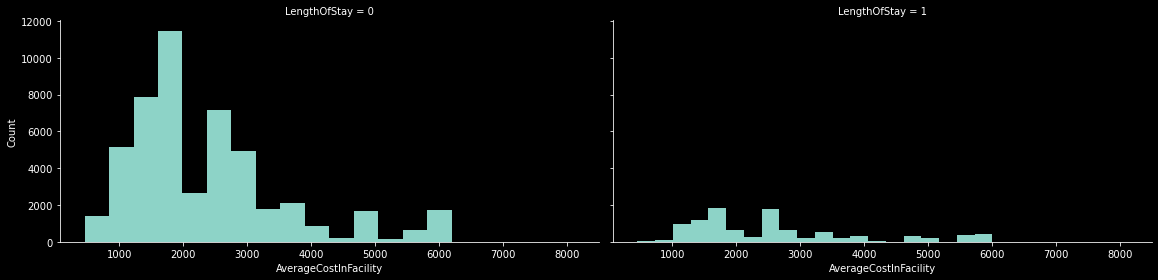

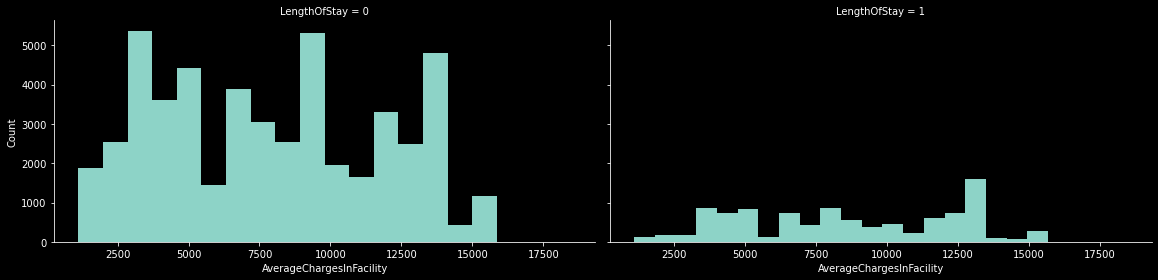

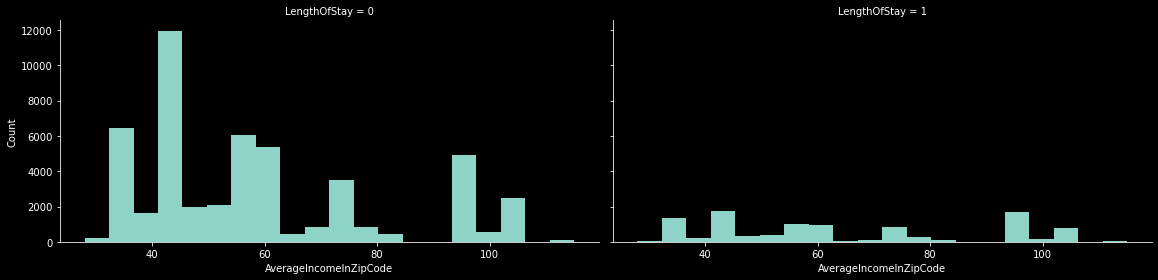

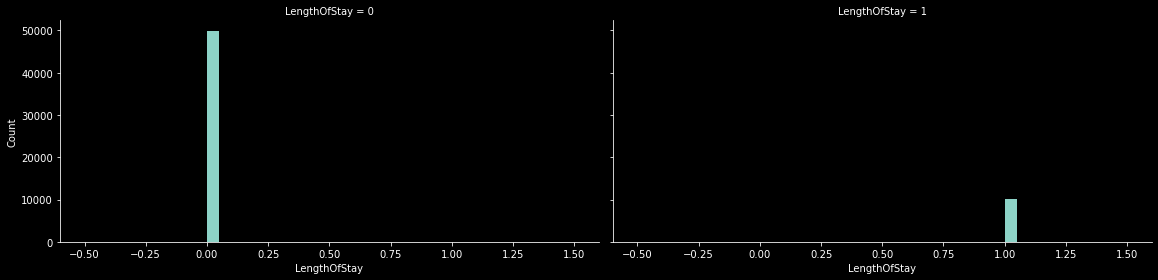

In [13]:
Facet_Grid_sns(train_data)

## 4. Data preparation

### 3.2 Split into X and y

In [14]:
X = train_data.drop('LengthOfStay', axis=1)
y = train_data['LengthOfStay']

### 4.1.  Encode norminal data

In [15]:
# Make a copy of X to prevent data lost if choose the wrong way
X_copy = X.copy()

# Determine norminal (categorical) data
encode_col = ['Gender', 
              'Race',
              'TypeOfAdmission', 
              'CCSProcedureCode',
              'PaymentTypology']

# Dummy encode process
for col in encode_col:
    dummy = pd.get_dummies(X_copy[col])  # Extract the labels
    X_copy = pd.concat([X_copy, dummy], axis=1)  # Append the encoded label to X 
    X_copy = X_copy.drop(col, axis=1)  # Drop the initial column after encode

# Check X_copy
X_copy.columns

Index([    'APRSeverityOfIllnessCode',                  'BirthWeight',
       'EmergencyDepartmentIndicator',          'AverageCostInCounty',
             'AverageChargesInCounty',        'AverageCostInFacility',
           'AverageChargesInFacility',       'AverageIncomeInZipCode',
                                  'F',                            'M',
                                  'U',       'Black/African American',
                       'Multi-racial',                   'Other Race',
                              'White',                     'Elective',
                          'Emergency',                      'Newborn',
                             'Urgent',                             -1,
                                    0,                            115,
                                  216,                            220,
                                  228,                            231,
             'Blue Cross/Blue Shield',       'Federal/State/Local/VA',
      

### 4.2. Drop outliner encoded-columns

The more attributes, the more complexity for our model. The "EmergencyDepartmentIndicator" can be converted to binary to minimize 1
column. We also drop the "U" gender as afroidmentioned.

In [16]:
# Convert Yes-No to binary 1-0 
X_copy['EmergencyDepartmentIndicator'] = X_copy['EmergencyDepartmentIndicator'].apply(lambda x: 1 if x == "Y" else 0)

# Drop encoded-columns
X_copy.drop(columns = ['U'],inplace = True)

In [17]:
X_copy.shape

(59966, 34)

### 4.1 Plot heatmap for correlations (encoded data)

<AxesSubplot:>

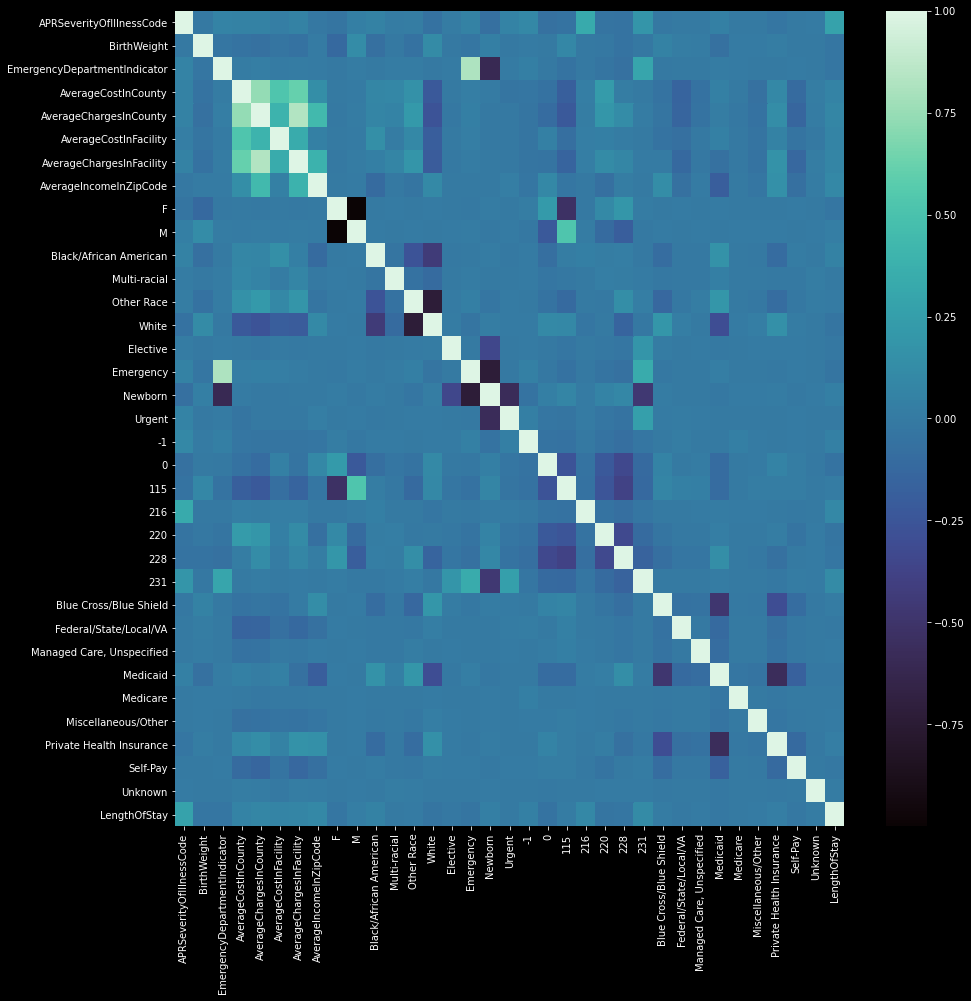

In [18]:
# Inspect correlation
tmp = pd.concat([X_copy, y], axis=1)  # Create a temporary dataframe to join X and y
correlations = tmp.corr()  # Compute correlation between attributes
fig, ax = plt.subplots(figsize=(15,15))   # Figure size innitialize

sns.heatmap(correlations, ax = ax, cmap ='mako')  # Draw heatmap

For the "LengthOfStay" in the last row, it seems like there are not so much feature attributes that affect the classification

## 5. Split data into training and testing set

### 5.1 Split dataset

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_copy, y, 
                                                    test_size=0.25, 
                                                    random_state = 2, 
                                                    stratify = y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(44974, 34)
(14992, 34)
(44974,)
(14992,)


<font color=red> **Parameters:** </font>

test_size = 0.25: Personal preference

random_state = 2: Using an int will produce the same results across different calls [1]

stratify = y: Ensure the random split ratio of 0 and 1 in train and test 

In [20]:
# Check X_train
X_train

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Urgent,-1,0,115,216,220,228,231,Blue Cross/Blue Shield,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown
30691,3,2600,0,3155,11381,2895,13394,45,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
50762,1,3900,0,2611,9227,3790,6250,45,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
29845,2,2700,0,1860,2846,1860,2846,53,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
21852,1,2600,0,2018,3610,2018,3610,52,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
8701,1,3400,0,2777,1587,2777,1587,54,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11936,1,2600,0,3155,11381,3032,10135,115,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
34101,1,3500,0,1445,3419,1691,3761,36,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
11723,1,3600,0,1826,4190,1459,3505,55,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1274,1,3000,0,3155,11381,3032,10135,84,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


### 5.2 Reset index

In [21]:
def df_reset_index(x):
    return x.reset_index().drop('index', axis = 1)

X_train = df_reset_index(X_train)
X_test = df_reset_index(X_test)
y_train = df_reset_index(y_train)
y_test = df_reset_index(y_test)

In [22]:
# Check X_train
X_train

,APRSeverityOfIllnessCode,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,F,M,Black/African American,Multi-racial,Other Race,White,Elective,Emergency,Newborn,Urgent,-1,0,115,216,220,228,231,Blue Cross/Blue Shield,Federal/State/Local/VA,"Managed Care, Unspecified",Medicaid,Medicare,Miscellaneous/Other,Private Health Insurance,Self-Pay,Unknown
0,3,2600,0,3155,11381,2895,13394,45,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,1,3900,0,2611,9227,3790,6250,45,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,2700,0,1860,2846,1860,2846,53,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,1,2600,0,2018,3610,2018,3610,52,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,3400,0,2777,1587,2777,1587,54,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44969,1,2600,0,3155,11381,3032,10135,115,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
44970,1,3500,0,1445,3419,1691,3761,36,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
44971,1,3600,0,1826,4190,1459,3505,55,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
44972,1,3000,0,3155,11381,3032,10135,84,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0


## 6. Scale data

The data to fit into some model need to be scale (For example: XGBoost, Logistic Regression with regularization). In our train dataset, there are both categorical and real number value. Applying scaler on categorical attributes will not affect the result of our model

In [23]:
from sklearn.preprocessing import StandardScaler

# Scaler variable and fit with X_train
scaler = StandardScaler()
scaler.fit(X_train)

# Transform X_train and X_test
X_train_transform = scaler.transform(X_train)
X_test_transform = scaler.transform(X_test)

# Ravel (return a contiguous flattened array) y to fit into some model
y_train_ravel = y_train.values.ravel()

## 7. Logistic Regression

Logistic Regression is the most basic and common binary classification model with sigmoid function. We will implement this model first and make comparison among differents model later.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 

### 7.1. Train model without optimization

First we train model with the no parameters input, then do the optimization (hyper-parameter tunning) later

In [25]:
log = LogisticRegression()
log.fit(X_train, y_train_ravel)

LogisticRegression()

In [26]:
y_pred_log = log.predict(X_test)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_log) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_log))

Logistic Regression
Accuracy: 84.06%
              precision    recall  f1-score   support

           0       0.85      0.99      0.91     12474
           1       0.63      0.12      0.21      2518

    accuracy                           0.84     14992
   macro avg       0.74      0.55      0.56     14992
weighted avg       0.81      0.84      0.79     14992



<font color=red> **Classification Report:** </font>

<font color=blue>**Accuracy** </font>: The sum of correct class 0 and 1 divided by all data points.

<font color=blue>**Precision** </font>: the proportion of positive identifications was actually correct. 85% of its prediction about class 0 are true, and 63% of class 1 are true.

<font color=blue>**Recall** </font>: the proportion of actual positives was identified correctly. It captured 99% class 0 correctly among all class 0 available and only 12% class 1 among all class 1 available. 

<font color=blue>**F1-score** </font>: the metrics to balance between the precision and the recall 2x((precision x recall) / (precision + recall)). The higher means that our model is balance in quantity and quality.

### 7.2. Train model with scaled data

In [37]:
log = LogisticRegression()
log.fit(X_train_transform, y_train_ravel)

LogisticRegression()

In [38]:
y_pred_log_scale = log.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_log_scale) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_log_scale))

Logistic Regression
Accuracy: 84.17%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12474
           1       0.61      0.15      0.25      2518

    accuracy                           0.84     14992
   macro avg       0.73      0.57      0.58     14992
weighted avg       0.81      0.84      0.80     14992



The accuracy improves a little bit, but the F1-score for class 1 increases significantly

### 7.3. Hyper-parameter tunning

#### 7.3.1. Global hyper-paremeter tunning

Using GridSearchCV library to determine the best parameters for a specific model [2].

<font color=red>**Parameters:** </font>

* estimator: the model we want to perform tunning
* param_grid: the dictionary with parameters name
* scoring: we want to use F1-score for measurement
* cv = 5: 5-fold cross validation
* n_jobs and verbose: Tunning setting

GridSearchCV (with CV stands for Cross-validation) will split the train data further into train and test to tune the hyper-parameters passed to it

In [29]:
# Global hyper-parameter tunning function
def hyper_parameter_tunning(X_train, y_train, model, param_tuning):
    gsearch = GridSearchCV(estimator = model,
                           param_grid = param_tuning,                        
                           scoring = metrics.make_scorer(metrics.f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)
    print("Best parameters:",gsearch.best_params_)

#### 7.3.2 Find best parameters for optimization

<font color=red>**Parameters:** </font>

* C: the inverse of regularization. The smaller the stronger we want the regularize
* penalty: type of regularization 
* solver: algorithm used in optimization
* max_iter: The maximum number of iterations by the solver during model fitting

In [30]:
# Determine parameters for logistic regression 
log_reg_params = {'penalty': ['l1', 'l2', 'elasticnet'], 
               'C': [0.001,0.01,0.1,1,10,100,1000],
                'max_iter': [100,250,500,1000],
               'solver': ['liblinear', 'saga','lbfgs']}

log_reg_model = LogisticRegression()

In [31]:
# UNCOMMENT TO RUN. ONLY RUN ONCE TO GET THE BEST PARAMETERS
# hyper_parameter_tunning(X_train_transform, y_train_ravel,log_reg_model, log_reg_params)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   40.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 17.8min
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed: 18.2min finished


Best F1-score: 0.2200643504079521
Best parameters: {'C': 1000, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Best parameters: {'C': 1000, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}, which means it couldn't perform much optimization than the original model 

#### 7.3.3. Train model with best parameters

In [32]:
log_op = LogisticRegression(C= 1000, max_iter= 100, penalty= 'l2', solver= 'liblinear')
log_op.fit(X_train_transform, y_train_ravel)

LogisticRegression(C=1000, solver='liblinear')

In [33]:
y_pred_log_op = log_op.predict(X_test_transform)

print('Logistic Regression')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_log_op) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_log_op))

Logistic Regression
Accuracy: 84.17%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     12474
           1       0.61      0.15      0.25      2518

    accuracy                           0.84     14992
   macro avg       0.73      0.57      0.58     14992
weighted avg       0.81      0.84      0.80     14992



As predicted, the accuracy and other metrics are the same to the original logistic model. We will try other models with higher efficiency in optimization for this problem.

## 8. Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(criterion='entropy', max_depth=None)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [37]:
y_pred_tree = clf.predict(X_test)

print('Decision Tree')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_tree) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_tree))

Decision Tree
Accuracy: 78.78%
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     12474
           1       0.34      0.29      0.32      2518

    accuracy                           0.79     14992
   macro avg       0.60      0.59      0.60     14992
weighted avg       0.77      0.79      0.78     14992



## 9. Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

### 9.1. Hyper-parameter tunning

In [39]:
# Only run once for best parameters
RF_params = {'n_estimators' : [100, 300, 500, 800, 1200],
             'max_depth' : [5, 8, 15, 25, 30],
             'min_samples_split' : [2, 5, 10, 15, 100],
             'min_samples_leaf' : [1, 2, 5, 10],
            'criterion': ['gini','entropy'],
            'bootstrap': [True, False]}

RF_model = RandomForestClassifier()

# hyper_parameter_tunning(X_train,y_train,RF_model, RF_params)

### 9.2. Train the model with best parameters

In [40]:
RF_clf = RandomForestClassifier(criterion='entropy', max_depth=None)
RF_clf.fit(X_train, y_train_ravel)

RandomForestClassifier(criterion='entropy')

In [41]:
y_pred_forest = RF_clf.predict(X_test)

print('Random Forest')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_pred_forest) * 100, 2)))
print(metrics.classification_report(y_test, y_pred_forest))

Random Forest
Accuracy: 81.25%
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     12474
           1       0.41      0.26      0.32      2518

    accuracy                           0.81     14992
   macro avg       0.64      0.59      0.61     14992
weighted avg       0.79      0.81      0.80     14992



## 10. XGBoost

In [ ]:
# Install xgboost library

!pip install xgboost

In [43]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

### 10.1. Hyper-parameter tunning

In [ ]:
# XGBoost hyper-parameter tuning
def hyperParameterTuning(X_train, y_train):
    param_tuning = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ], 
      "objective" : ["binary:logistic"]}

    xgb_model = XGBClassifier()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = make_scorer(f1_score),  
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
# Only run once for best parameters
# hyperParameterTuning(X_train,y_train_ravel)

### 10.2. Train model with the best parameters

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic')
# learning_rate = 0.05, max_depth = 8, min_child_weight = 3, gamma=  0.2, colsample_bytree =0.4, objective = 'binary:logistic'
# learning_rate = 0.1, max_depth = 7, min_child_weight = 5, gamma=  0.0, colsample_bytree =0.4, objective = 'binary:logistic'
xgb.fit(X_train, y_train_ravel)

### 10.3. Classification report

In [ ]:
y_xgb = xgb.predict(X_test)

print('XGBoostClassifier')
print('Accuracy: {facc}%'.format(facc=round(metrics.accuracy_score(y_test, y_xgb) * 100, 2)))
print(metrics.classification_report(y_test, y_xgb))

In [ ]:
from xgboost import plot_importance

plot_importance(xgb, max_num_features = 30)
plt.figure(figsize=(50,50))
plt.show()

## 11. Apply on Test dataset

In [ ]:
test_data = pd.read_csv("test_data.csv")
submission = pd.DataFrame(columns=['ID','LengthOfStay'])
submission['ID'] = test_data['ID']
test_data = test_data.drop(['ID','HealthServiceArea'], axis = 1)

test_data.head()

In [ ]:
for col in test_data.columns:
    print(col)
    count = test_data[col].value_counts()
    percent = test_data[col].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
    print(pd.DataFrame({'Counts': count, 'Percent': percent}))
    print('--------------------------------')

In [ ]:
test_copy = test_data.copy()

test_copy['PaymentTypology'] = test_copy['PaymentTypology'].replace(to_replace ="Department of Corrections", value = "Unknown")
test_copy['EmergencyDepartmentIndicator'] = test_copy['EmergencyDepartmentIndicator'].apply(lambda x: 1 if x == "Y" else 0)

for col in encode_col:
    dummy = pd.get_dummies(test_copy[col])
    test_copy = pd.concat([test_copy, dummy], axis=1)
    test_copy = test_copy.drop(col, axis=1)

# Drop encoded-columns           
test_copy.drop(columns = ['U','Trauma'],inplace = True)
              
# Check test_copy
test_copy.columns

In [ ]:
test_transform = scaler.transform(test_copy)

pred_xgb = xgb.predict(test_copy)
pred_log = logistic.predict(test_transform)

pred_xgb

In [ ]:
u,c = np.unique(pred_xgb, return_counts = True)
u1,c1 = np.unique(pred_log, return_counts = True)
print(dict(zip(u,c)))
print(dict(zip(u1,c1)))

In [ ]:
# submission['LengthOfStay'] = pd.Series(pred_xgb)

# submission.to_csv('test_xgb_3.csv',index=False)